In [25]:
import numpy as np
import pandas as pd

In [45]:
!pip install matplotlib

In [46]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [47]:
data = pd.read_csv('/content/sales.csv')

In [48]:
# Grab the relavent data,scale the predictor variable,and add a colum
x = data['GrLivArea']
y = data['SalePrice']

In [49]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]#adds a column of ones to the array

In [30]:
# GRADIENT DESCENT
alpha = 0.01#STEP size
iterations = 1000#No.od data iteration
m = y.size#No.od data points
np.random.seed(123)#Set the seed
theta = np.random.rand(2)#Pick some random values to start with

In [50]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)

    return past_thetas, past_costs


In [51]:
 #Pass the relevent variables to the function and get the new value
 past_thetas,past_costs = gradient_descent(x, y, theta, iterations, alpha)
 theta = past_thetas[-1]

In [33]:
# Print the result...
print("Gradient descent:{:.2f},{:.2f}".format(theta[0], theta[1]))

Gradient descent:180913.39,56292.45


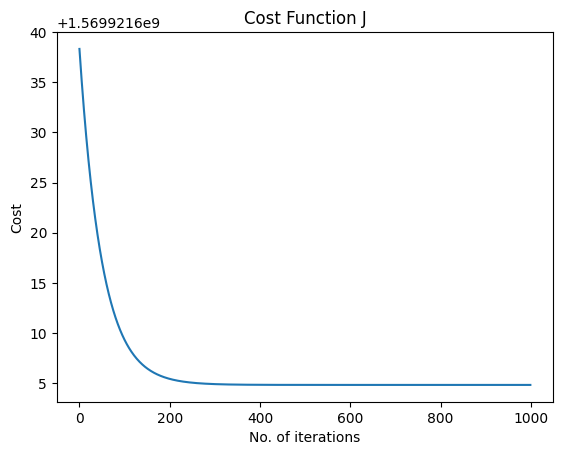

In [52]:
#plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [53]:
#Animation

#set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1,70000,'')
annotation.set_animated(True)
plt.close()

In [54]:
#generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line,annotation

In [55]:
#animation function. This is called sequentially
def animate(i):
  x = np.linspace(-5,20,1000)
  y = past_thetas[i][1]*x + past_thetas[i][0]
  line.set_data(x, y)
  annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
  return line,annotation

In [58]:
anim = animation.FuncAnimation(fig, animate, init_func=init, # Pass animate function instead of animation module
                               frames=300, interval=0, blit=True)

In [59]:

anim.save('animation.gif', writer='imagemagick', fps=30)

In [60]:
#display the animation
import io
import base64
from IPython.display import HTML



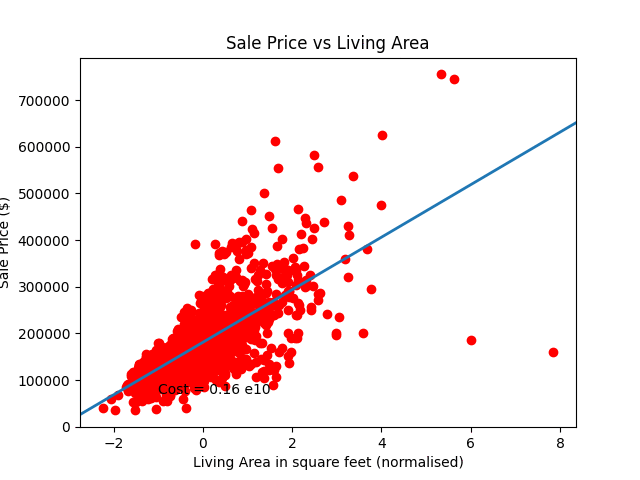

In [61]:
filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))